# Absolute Orientation of Two 3D Point Sets

## Goal

Given two 3D point sets $P$ and $Q$ as $3{\times}N$ matrices, the absolute orientation is a problem that finds rotation $R$, translation $t$, and scale $s$ satisfying
\begin{equation}
Q = s R P + t .
\end{equation}

Here, each corresponding columns of $P$ and $Q$ are assumed to be a corresponding point pair in 3D.

* Input
  * $P$, $Q$
* Output
  * $R, t, s$


## References
* Horn. Closed-form solution of absolute orientation using unit quaternions, JOSA 1987


## Libraries

In [1]:
%matplotlib notebook
import numpy as np
import os
import sys
import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from pycalib.calib import absolute_orientation


## Synthetic data

<IPython.core.display.Javascript object>


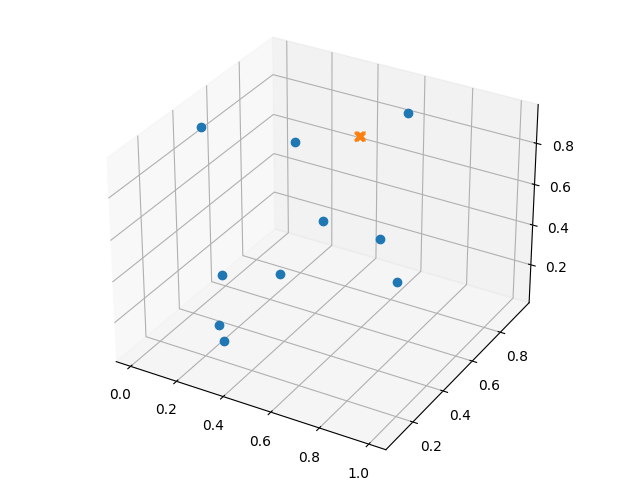

In [2]:
N = 10
P = np.random.random((3, N))
R, _ = cv2.Rodrigues(np.random.random(3))
t = np.random.random(3)
s = np.random.random(1)
Q = s * (R @ P) + t[:, None]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.plot(P[0,:], P[1,:], P[2,:], 'o')
ax.plot(Q[0,:], Q[1,:], Q[2,:], 'x')
fig.show()

## Absolute Orientation

<IPython.core.display.Javascript object>


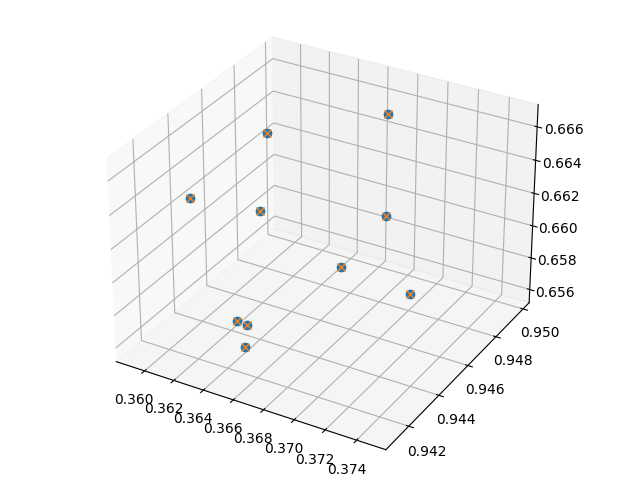

In [3]:
R2, t2, s2 = absolute_orientation(P, Q)

P2 = s2 * (R2 @ P) + t2[:, None]

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.plot(P2[0,:], P2[1,:], P2[2,:], 'o')
ax.plot(Q[0,:], Q[1,:], Q[2,:], 'x')
fig.show()

assert np.allclose(R, R2)
assert np.allclose(t, t2)
assert np.allclose(s, s2)
